# Librerias

In [63]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math 
from keras.preprocessing.image import ImageDataGenerator

# Creación de capa de grises

In [81]:
class Color_Gris(tf.keras.layers.Layer):
    def __init__(self):
        super(Color_Gris,self).__init__()
    def call(self, input):
        imagen_gris = tf.reduce_mean(input, axis=3) 
        return imagen_gris

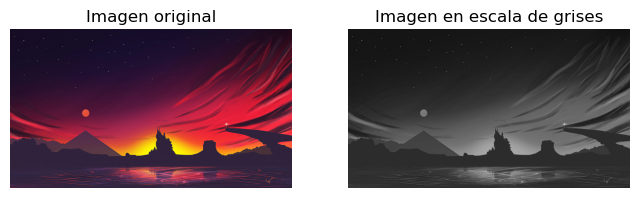

In [83]:
def visualizar_imagen(ruta_imagen):
    # Cargar la imagen
    imagen_color = tf.io.read_file(ruta_imagen)
    imagen_color = tf.image.decode_jpeg(imagen_color, channels=3)  # Leer como imagen RGB
    imagen_color = tf.cast(imagen_color, tf.uint8)  # Convertir a tipo de dato uint8
    
    # Mostrar la imagen original
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_color)
    plt.title('Imagen original')
    plt.axis('off')
    
    # Aplicar la capa Color_Gris
    capa_color_gris = Color_Gris()
    imagen_gris = capa_color_gris(tf.expand_dims(imagen_color, axis=0))
    # Mostrar la imagen en escala de grises
    plt.subplot(1, 2, 2)
    plt.imshow(tf.squeeze(imagen_gris, axis=0), cmap='gray')
    plt.title('Imagen en escala de grises')
    plt.axis('off')
    
    plt.show()

# Ruta de la imagen de ejemplo
ruta_imagen = 'atardecer.jpg'

# Visualizar la imagen
visualizar_imagen(ruta_imagen)

## Implementación de la capa

In [84]:
inputs = keras.Input(shape=(150,150,3))
x = Color_Gris()(inputs)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)


# Resumir el modelo
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 color__gris_36 (Color_Gris)  (None, 150, 150)         0         
                                                                 
 flatten_18 (Flatten)        (None, 22500)             0         
                                                                 
 dense_55 (Dense)            (None, 100)               2250100   
                                                                 
 dense_56 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,250,201
Trainable params: 2,250,201
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preprocesamiento de datos
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/home/dracdarktime/Downloads/PerrosyGatos/DogsCats/minitrain',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Entrenar el modelo
model.fit(train_generator, epochs=5)

Found 602 images belonging to 2 classes.


Epoch 1/5


2024-03-09 17:09:49.990274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


31/31 [==============================] - 12s 266ms/step - loss: 2.1197 - accuracy: 0.4635
Epoch 2/5
31/31 [==============================] - 8s 259ms/step - loss: 0.7433 - accuracy: 0.5465
Epoch 3/5
31/31 [==============================] - 8s 260ms/step - loss: 0.6893 - accuracy: 0.5764
Epoch 4/5
31/31 [==============================] - 9s 291ms/step - loss: 0.7234 - accuracy: 0.5764
Epoch 5/5
31/31 [==============================] - 8s 268ms/step - loss: 0.7106 - accuracy: 0.5814
